In [128]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

In [129]:
whale_csvpath = Path("../pandas-homework/homework-csvfiles/whale_returns.csv")
algo_csvpath = Path("../pandas-homework/homework-csvfiles/algo_returns.csv")
sp500_csvpath = Path("../pandas-homework/homework-csvfiles/sp500_history.csv")

In [130]:
#Data Cleaning
whale_df = pd.read_csv(whale_csvpath, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [131]:
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [132]:
whale_df.dropna(inplace=True)
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [133]:
algo_df = pd.read_csv(algo_csvpath, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [134]:
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [135]:
algo_df.dropna(inplace=True)
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [136]:
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [137]:
sp500_df = pd.read_csv(sp500_csvpath, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [138]:
sp500_df['Close'] = sp500_df['Close'].str.replace('$', '')
sp500_df['Close'] = sp500_df['Close'].astype('float')

In [139]:
sp500_df.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [240]:
#Portfolio Analysis
sp500_df_returns = sp500_df.pct_change()
sp500_df_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [144]:
sp500_df_returns.dropna(inplace=True)
sp500_df_returns.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [150]:
sp500_df_returns.rename(columns={
    "Close":"S&P 500"
},inplace=True)
sp500_df_returns.head()

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [153]:
concat_df = pd.concat([whale_df, algo_df, sp500_df_returns ], axis="columns", join="inner")
concat_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


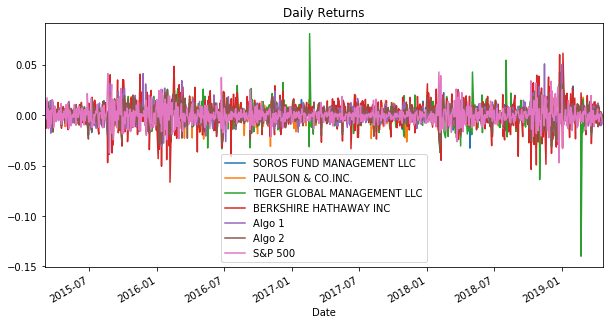

In [159]:
concat_df.plot(figsize=(10,5),title="Daily Returns")

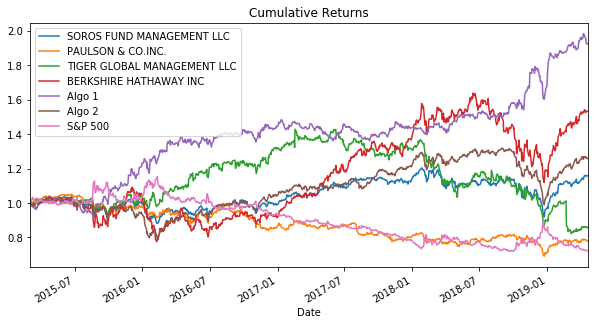

In [208]:
cumulative_returns = (1 + concat_df).cumprod()
cumulative_returns.plot(figsize=(10,5),title="Cumulative Returns")

In [210]:
#Subject to change
concat_df_2015 = concat_df.loc['2015-03-03':'2016-12-31']
D = len(concat_df_2015)
concat_df_2015_returns = concat_df_2015.add(1).prod()**(12/D)-1
concat_df_2015_returns

SOROS FUND MANAGEMENT LLC     -0.000260
PAULSON & CO.INC.             -0.003893
TIGER GLOBAL MANAGEMENT LLC    0.007078
BERKSHIRE HATHAWAY INC        -0.002268
Algo 1                         0.009516
Algo 2                         0.001027
S&P 500                       -0.001777
dtype: float64

In [221]:
#Needs retuning
returns_data_grp = concat_df.groupby([concat_df.index.year]).first()
returns_data_grp

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2016,-0.013263,-0.006037,-0.006017,-0.043190,-0.000307,-0.014485,-0.002008
2017,0.004301,0.015299,0.003969,0.008224,0.007381,0.009358,-0.005690
2018,0.014546,0.015045,-0.004784,0.031017,0.001254,0.017222,-0.006358
2019,0.006027,0.015429,0.007881,-0.001554,0.050342,0.018022,0.025385


In [238]:
#Analyze Returns****************************

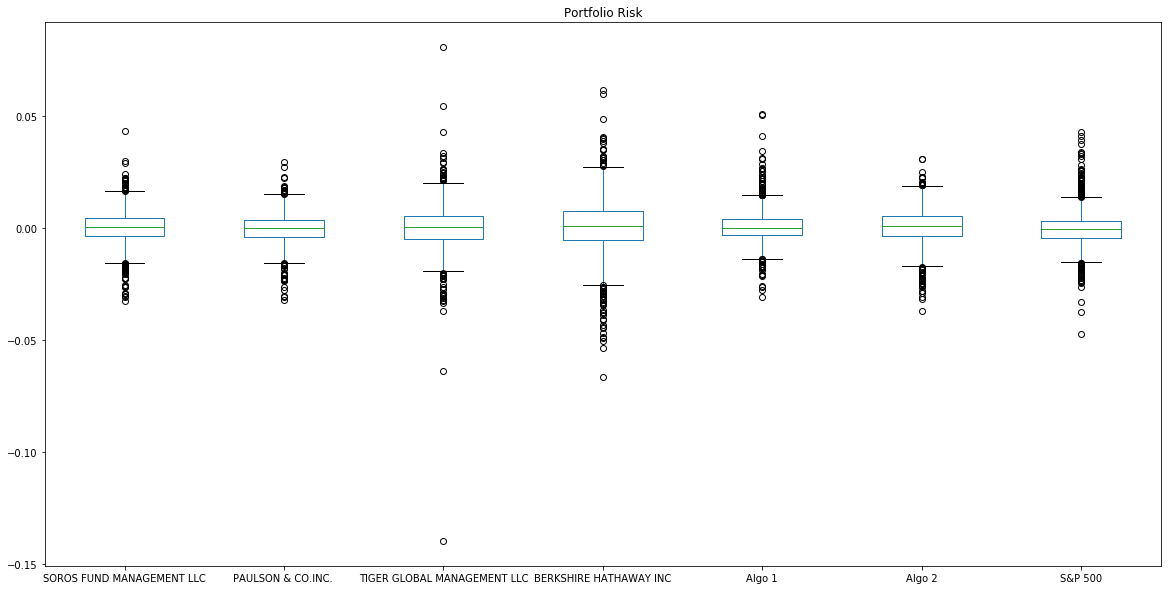

In [239]:
#Risk
concat_df.plot.box(figsize=(20,10), title="Portfolio Risk")

In [235]:
daily_std = concat_df.std()
daily_std

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P 500                        0.008587
dtype: float64

In [241]:
#Determine which stocks are riskier using True/False

In [237]:
annualized_std = daily_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&P 500                        0.136313
dtype: float64

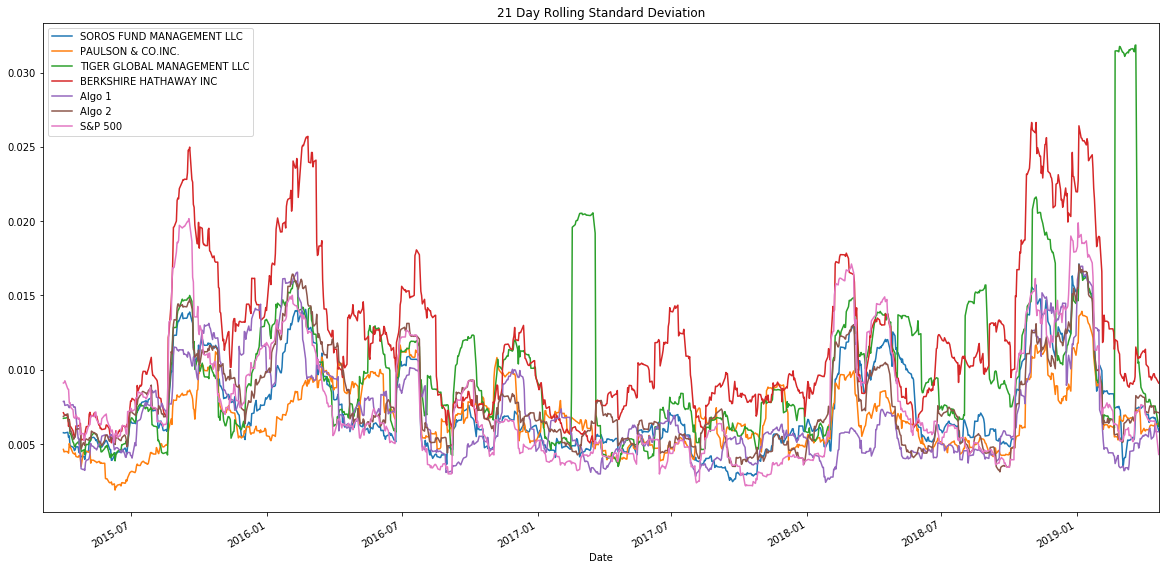

In [250]:
#Rolling Statistics
concat_df.rolling(window=21).std().plot(figsize=(20,10), title="21 Day Rolling Standard Deviation")

In [251]:
concat_df.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


In [253]:
covariance_returns = concat_df['BERKSHIRE HATHAWAY INC'].cov(concat_df['S&P 500'])
covariance_returns

-1.5371091324717573e-06

In [255]:
variance_returns = concat_df['S&P 500'].var()
variance_returns

7.373467552840441e-05

In [263]:
berkshire_beta = covariance_returns / variance_returns
berkshire_beta

-0.020846489408902668

In [258]:
rolling_covariance = concat_df['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(concat_df['S&P 500'])

In [259]:
rolling_variance = concat_df['S&P 500'].rolling(window=60).var()

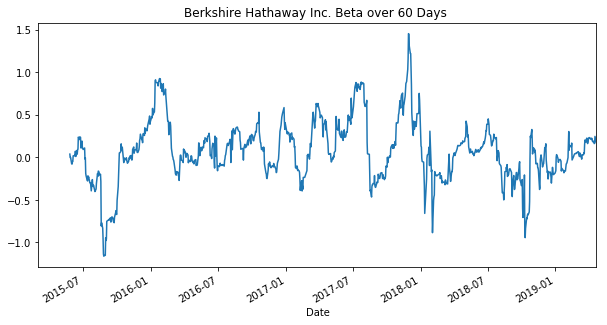

In [262]:
rolling_beta_berk = rolling_covariance/rolling_variance
rolling_beta_berk.plot(figsize=(10,5), title="Berkshire Hathaway Inc. Beta over 60 Days ")

In [266]:
#Sharpe Ratios
sharpe_ratios = (concat_df.mean() * 252) / (concat_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P 500                       -0.518582
dtype: float64

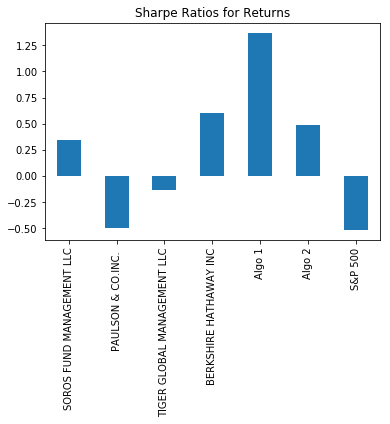

In [267]:
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios for Returns")

In [284]:
#Portfolio Returns
baba_csvpath = Path("../pandas-homework/homework-csvfiles/BABA.csv")
ge_csvpath = Path("../pandas-homework/homework-csvfiles/GE.csv")
nflx_csvpath = Path("../pandas-homework/homework-csvfiles/NFLX.csv")
tsla_csvpath = Path("../pandas-homework/homework-csvfiles/TSLA.csv")

In [312]:
baba_df = pd.read_csv(baba_csvpath, index_col="Date", infer_datetime_format=True, parse_dates=True)
baba_df.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'], inplace=True)
baba_df.columns = ['NOCP']
baba_df['Symbol'] = 'BABA'
baba_df = baba_df[["Symbol", "NOCP"]]
baba_df.head()

,Symbol,NOCP
Date,,
2015-03-03,BABA,81.580002
2015-03-04,BABA,85.489998
2015-03-05,BABA,86.099998
2015-03-06,BABA,84.400002
2015-03-09,BABA,82.529999


In [313]:
ge_df = pd.read_csv(ge_csvpath, index_col="Date", infer_datetime_format=True, parse_dates=True)
ge_df.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'], inplace=True)
ge_df.columns = ['NOCP']
ge_df['Symbol'] = 'GE'
ge_df = ge_df[["Symbol", "NOCP"]]
ge_df.head()

,Symbol,NOCP
Date,,
2015-03-03,GE,24.865385
2015-03-04,GE,24.673077
2015-03-05,GE,24.826923
2015-03-06,GE,24.442308
2015-03-09,GE,24.653847


In [314]:
nflx_df = pd.read_csv(nflx_csvpath, index_col="Date", infer_datetime_format=True, parse_dates=True)
nflx_df.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'], inplace=True)
nflx_df.columns = ['NOCP']
nflx_df['Symbol'] = 'NFLX'
nflx_df = nflx_df[["Symbol", "NOCP"]]
nflx_df.head()

,Symbol,NOCP
Date,,
2015-03-03,NFLX,67.815712
2015-03-04,NFLX,67.110001
2015-03-05,NFLX,66.807144
2015-03-06,NFLX,64.874283
2015-03-09,NFLX,63.661430
